# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='int32')

Plot the training data

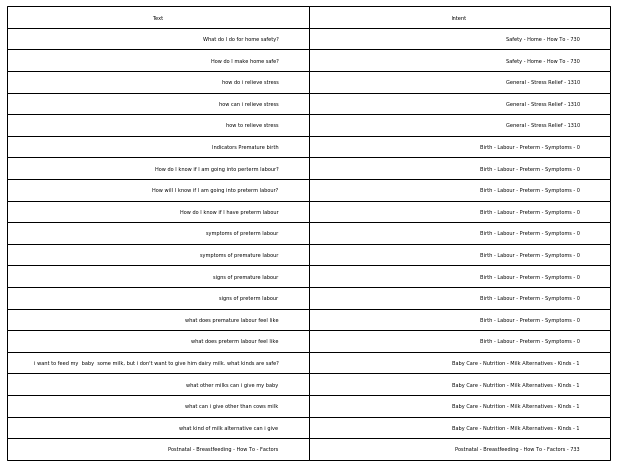

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

In [7]:
import torch
torch.__version__

'0.4.1'

Start training the classification model and save

In [8]:
from text_classification.sif_ovr.model import OvrClassifierWrapper
from text_classification.sif_ovr.train import OvrClassifierLearner
from common.callbacks import PrintLoggerCallback

model = OvrClassifierWrapper({'num_classes': num_classes})
learner = OvrClassifierLearner(model)

In [9]:
learner.fit(
    training_data=(X_train, y_train),
    batch_size=64,
    epochs=100,
    callbacks=[PrintLoggerCallback(log_every=5)]
)

13m 11s (- 250m 42s) (5 5%) - loss: 990.4704 - accuracy: 0.0000
25m 16s (- 227m 27s) (10 10%) - loss: 990.4498 - accuracy: 0.0000
37m 17s (- 211m 18s) (15 15%) - loss: 989.9385 - accuracy: 0.0000
49m 8s (- 196m 32s) (20 20%) - loss: 990.5595 - accuracy: 0.0000
61m 3s (- 183m 9s) (25 25%) - loss: 990.8239 - accuracy: 0.0000
73m 33s (- 171m 38s) (30 30%) - loss: 989.6884 - accuracy: 0.0000
87m 14s (- 162m 0s) (35 35%) - loss: 989.3981 - accuracy: 0.0000
102m 23s (- 153m 34s) (40 40%) - loss: 991.2661 - accuracy: 0.0000
117m 20s (- 143m 25s) (45 45%) - loss: 990.1144 - accuracy: 0.0000
132m 17s (- 132m 17s) (50 50%) - loss: 989.9826 - accuracy: 0.0000
147m 14s (- 120m 27s) (55 55%) - loss: 989.8214 - accuracy: 0.0000
160m 43s (- 107m 9s) (60 60%) - loss: 990.3114 - accuracy: 0.0000
176m 42s (- 95m 9s) (65 65%) - loss: 990.5295 - accuracy: 0.0000
190m 32s (- 81m 39s) (70 70%) - loss: 991.3571 - accuracy: 0.0000
204m 52s (- 68m 17s) (75 75%) - loss: 989.4998 - accuracy: 0.0000
218m 30s (- 5

In [10]:
torch.topk(model(['good morning!']), 50)

(tensor([[0.4217, 0.3438, 0.3406, 0.3279, 0.3260, 0.3120, 0.3064, 0.2966, 0.2957,
          0.2932, 0.2932, 0.2891, 0.2872, 0.2811, 0.2809, 0.2795, 0.2744, 0.2714,
          0.2711, 0.2672, 0.2620, 0.2605, 0.2603, 0.2597, 0.2595, 0.2594, 0.2593,
          0.2560, 0.2520, 0.2513, 0.2448, 0.2442, 0.2414, 0.2385, 0.2381, 0.2338,
          0.2313, 0.2307, 0.2304, 0.2296, 0.2264, 0.2263, 0.2235, 0.2231, 0.2230,
          0.2203, 0.2199, 0.2199, 0.2193, 0.2169]]),
 tensor([[1415, 1217,  230, 1119, 1253,  529,  992,  262,  389,  987, 1101,  589,
          1118,  239,  948,  493, 1333,  254,  753,  355, 1098,  775,  528, 1209,
           198, 1120,  481,  648, 1070,  200,  412, 1199,  288,   47, 1132,  105,
           571,  233, 1162,  914, 1336,  605,  669,  191,  679,  920, 1175,  836,
           637,  949]]))

In [11]:
model(['the earth is flat'])

tensor([[ 0.0391,  0.0096, -0.0239,  ...,  0.1322,  0.0164, -0.0222]])

In [15]:
classes[230]

'Symptoms - Edema - Treatment'